# **Loading Dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 19.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [ ]:
!cp /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv .

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Basic Information per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Statistic Information per column
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


# **Missing Value Analysis**

In [ ]:
# Identify missing data per column.
missing_counts = df.isnull().sum()
print(missing_counts)

# Total missing data
total_missing = df.isnull().sum().sum()
print(f"Total missing data: {total_missing}")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total missing data: 866


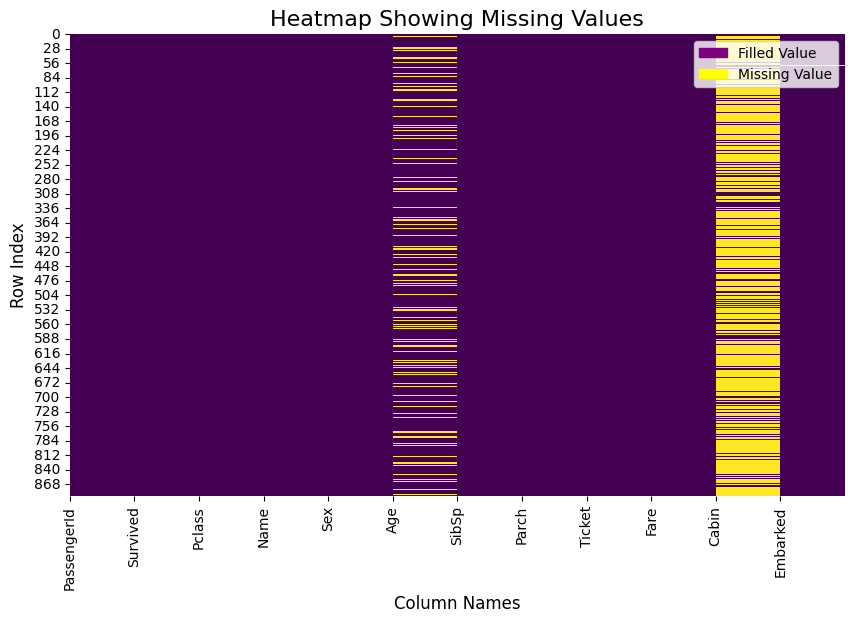

In [ ]:
# Plot heatmap showing missing data locations.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Thêm tiêu đề và nhãn cột
plt.title('Heatmap Showing Missing Values', fontsize=16)
plt.xlabel('Column Names', fontsize=12)
plt.ylabel('Row Index', fontsize=12)

# Đặt nhãn cho cột
plt.xticks(ticks=range(len(df.columns)), labels=df.columns)

filled_patch = mpatches.Patch(color='purple', label='Filled Value')
missing_patch = mpatches.Patch(color='yellow', label='Missing Value')

# Đặt legend
plt.legend(handles=[filled_patch, missing_patch], loc='upper right')

plt.show()

In [ ]:
# Percentage of missing data per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


# **Handling Dataset**

## **Dropping Unnecessary Columns & Rows**

In [ ]:
# Drop the 'Cabin' column since it has too many missing values (77%)
df.drop(columns=['Cabin'], inplace=True)
print("Cabin column dropped successfully.")

Cabin column dropped successfully.


In [ ]:
# Apply only Drop rows tech with missing data in 'Embarked' column since there are 2 missing value rows
df.dropna(subset='Embarked', inplace=True)
df.reset_index(drop=True, inplace=True)
print("Embarked column's NaN rows dropped successfully.")

Embarked column's NaN rows dropped successfully.


## **Encoding Categorical Variables**

In [ ]:
# Encoding Categorical Variables
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoding categorical columns ('Sex' and 'Embarked')
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)  # Drop first to avoid dummy variable trap
encoded_cols = pd.DataFrame(encoder.fit_transform(df[['Sex', 'Embarked']]))  # Encode and transform categorical columns
encoded_cols.columns = encoder.get_feature_names_out(['Sex', 'Embarked'])  # Assign column names to the encoded features
# Concatenate the new encoded columns with the dataset and drop the original categorical columns
df = pd.concat([df, encoded_cols], axis=1).drop(columns=['Sex', 'Embarked'])
print("Categorical variables encoded successfully.")

Categorical variables encoded successfully.


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1.0,0.0,1.0
885,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0.0,0.0,1.0
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,0.0,0.0,1.0
887,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1.0,0.0,0.0


## **Apply different missing value handling techs**
4 missing value handling techs including Drop rows, Median Imputation, KNN, MICE applied for Age column

### **Drop rows**

In [ ]:
drop_nan_df = df.dropna(subset=['Age'])
drop_nan_df.reset_index(drop=True, inplace=True)
print("Age column's NaN rows dropped successfully.")

Age column's NaN rows dropped successfully.


### **Median Imputation**

In [ ]:
imputated_col = df['Age'].fillna(df['Age'].median())  # Median imputation
median_imputation_df = pd.concat([df.drop(columns=['Age']), imputated_col], axis=1)
print("Age column's NaN rows imputated successfully.")

Age column's NaN rows imputated successfully.


### **KNN**

In [ ]:
from sklearn.impute import KNNImputer

# Áp dụng KNN Imputer
imputer = KNNImputer()
imputated_col = pd.DataFrame(imputer.fit_transform(df[["Age"]]), columns=["Age"])
knn_imputation_df = pd.concat([df.drop(columns=['Age']), imputated_col], axis=1)
print("Age column's NaN rows imputated successfully.")

Age column's NaN rows imputated successfully.


### MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer for appyling MICE
imputer = IterativeImputer(max_iter=10, random_state=42)
numeric_df = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
imputed_data = imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)
mice_imputation_df = pd.concat([df.drop(columns=numeric_df.columns), imputed_df], axis=1)
mice_imputation_df['Age'] = mice_imputation_df['Age'].clip(lower=0)

# **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split

def split_dataset(df):
    # Separate features (X) and target variable (y)
    X = drop_nan_df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])  # Features
    y = drop_nan_df['Survived']  # Target variable

    # Split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return {"accuracy_score": acc,
            "f1_score": f1}

In [ ]:
eval_results = {"random_forest": {},
                "logistic_regression": {}}

## **Random Forest**

### **Drop rows**

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(drop_nan_df)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
eval_results["random_forest"]["drop_rows"] = evaluate_model(model, X_test, y_test)
eval_results["random_forest"]["drop_rows"]

{'accuracy_score': 0.7692307692307693, 'f1_score': 0.7317073170731707}

### **Median Imputation**

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(median_imputation_df)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
eval_results["random_forest"]["median_imputation"] = evaluate_model(model, X_test, y_test)
eval_results["random_forest"]["median_imputation"]

{'accuracy_score': 0.7902097902097902, 'f1_score': 0.7540983606557377}

### **KNN**

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(knn_imputation_df)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
eval_results["random_forest"]["knn_imputation"] = evaluate_model(model, X_test, y_test)
eval_results["random_forest"]["knn_imputation"]

{'accuracy_score': 0.7832167832167832, 'f1_score': 0.743801652892562}

### **MICE**

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(mice_imputation_df)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
eval_results["random_forest"]["mice_imputation"] = evaluate_model(model, X_test, y_test)
eval_results["random_forest"]["mice_imputation"]

{'accuracy_score': 0.7902097902097902, 'f1_score': 0.75}

## **Logistic Regression**

### **Drop rows**

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(drop_nan_df)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
eval_results["logistic_regression"]["drop_rows"] = evaluate_model(model, X_test, y_test)
eval_results["logistic_regression"]["drop_rows"]

{'accuracy_score': 0.7972027972027972, 'f1_score': 0.7387387387387387}

### **Median Imputation**

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(median_imputation_df)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
eval_results["logistic_regression"]["median_imputation"] = evaluate_model(model, X_test, y_test)
eval_results["logistic_regression"]["median_imputation"]

{'accuracy_score': 0.7972027972027972, 'f1_score': 0.7387387387387387}

### **KNN**

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(knn_imputation_df)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
eval_results["logistic_regression"]["knn_imputation"] = evaluate_model(model, X_test, y_test)
eval_results["logistic_regression"]["knn_imputation"]

{'accuracy_score': 0.7972027972027972, 'f1_score': 0.7387387387387387}

### **MICE**

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(mice_imputation_df)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
eval_results["logistic_regression"]["mice_imputation"] = evaluate_model(model, X_test, y_test)
eval_results["logistic_regression"]["mice_imputation"]

{'accuracy_score': 0.7972027972027972, 'f1_score': 0.7387387387387387}

# **Evaluation Results**

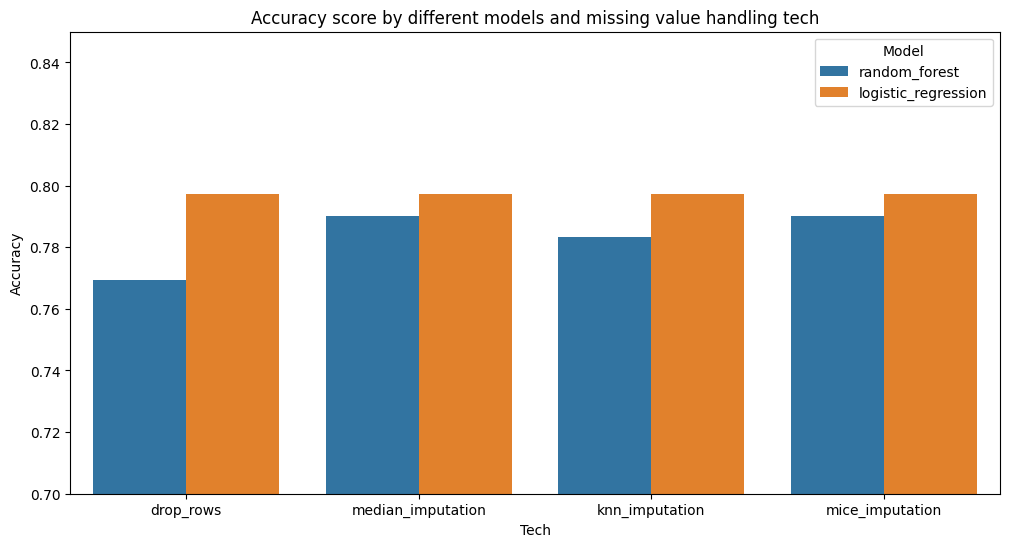

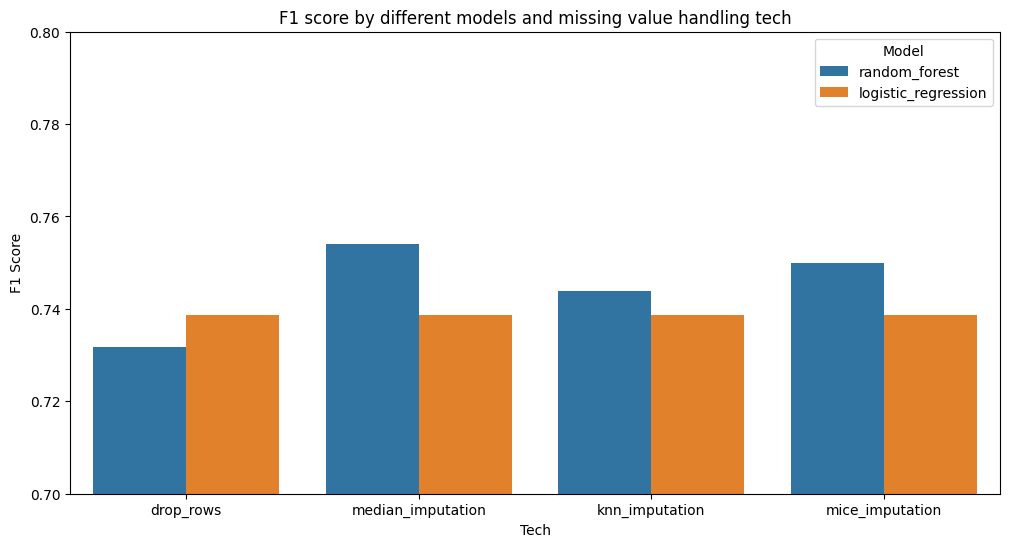

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chuyển dữ liệu thành DataFrame
data = []
for model, strategies in eval_results.items():
    for strategy, scores in strategies.items():
        data.append([model, strategy, scores['accuracy_score'], scores['f1_score']])

df = pd.DataFrame(data, columns=['Model', 'Tech', 'Accuracy', 'F1 Score'])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x='Tech', y='Accuracy', hue='Model', data=df)
plt.title('Accuracy score by different models and missing value handling tech')
plt.ylim(0.7, 0.85)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Tech', y='F1 Score', hue='Model', data=df)
plt.title('F1 score by different models and missing value handling tech')
plt.ylim(0.7, 0.8)
plt.show()

